In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('../raw data/RawData.csv')

Những feature nào ảnh hưởng lớn nhất tới saleprice

In [4]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


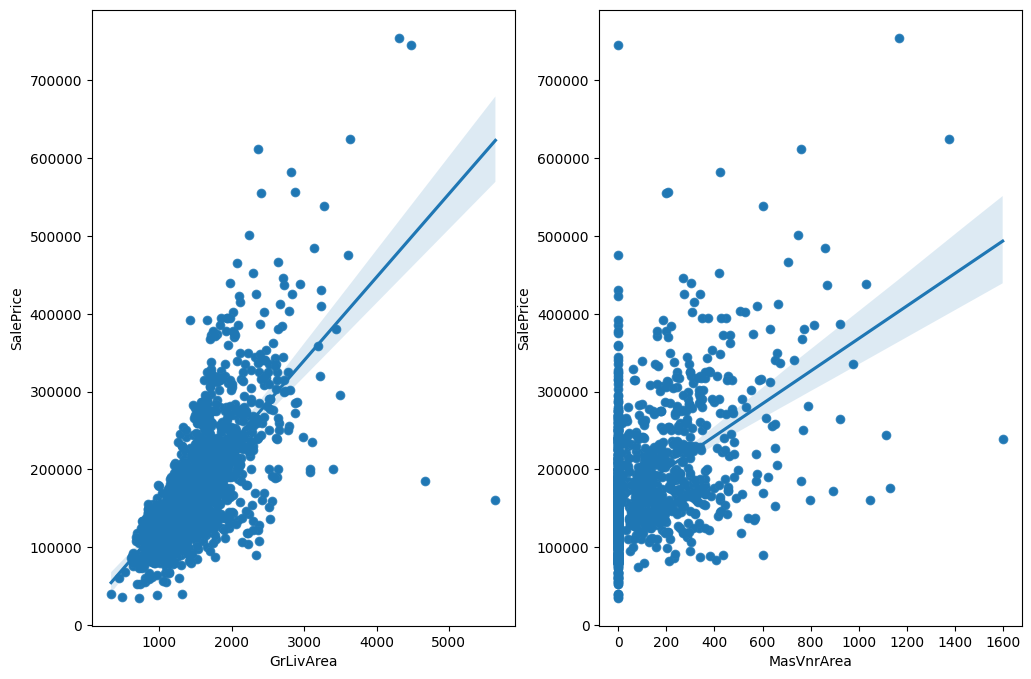

In [5]:
## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
## Scatter plotting for SalePrice and GrLivArea. 
sns.scatterplot( x = data.GrLivArea, y = data.SalePrice,  ax=ax1)
## Putting a regression line. 
sns.regplot(x=data.GrLivArea, y=data.SalePrice, ax=ax1)

## Scatter plotting for SalePrice and MasVnrArea. 

sns.scatterplot(x = data.MasVnrArea,y = data.SalePrice, ax=ax2)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x=data.MasVnrArea, y=data.SalePrice, ax=ax2);

Fill Missing value

C:\Users\longv\AppData\Local\Temp\ipykernel_17020\726066774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['1stFlrSF'])


<Axes: xlabel='1stFlrSF', ylabel='Density'>

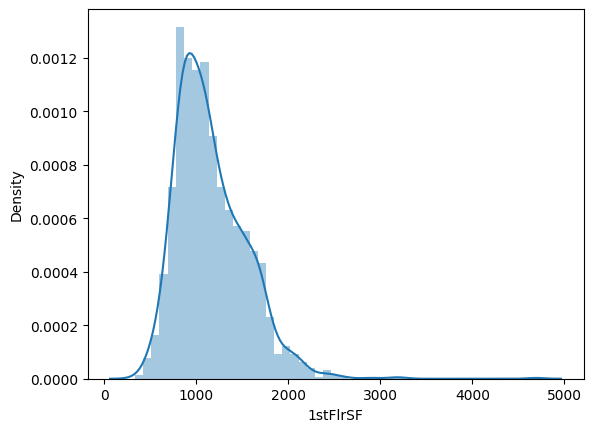

In [8]:
sns.distplot(data['1stFlrSF'])

Chuyen cac dac trung ve phan phoi giong gaussian 

In [9]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [11]:
numeric_feats = data.dtypes[data.dtypes != "object"].index

In [12]:
skewed_feats = data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

In [13]:
skewed_feats 

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
LotFrontage            NaN
MasVnrArea             NaN
G

In [14]:
high_skew = skewed_feats[abs(skewed_feats) > 0.5]

In [15]:
skewed_features = high_skew.index


In [16]:
skewed_features

Index(['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
       'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
       'EnclosedPorch', 'OpenPorchSF', 'SalePrice', 'BsmtFinSF1', 'WoodDeckSF',
       'TotalBsmtSF', 'MSSubClass', '1stFlrSF', 'GrLivArea', 'BsmtUnfSF',
       '2ndFlrSF', 'OverallCond', 'TotRmsAbvGrd', 'HalfBath', 'Fireplaces',
       'BsmtFullBath', 'YearRemodAdd', 'YearBuilt'],
      dtype='object')

In [17]:
data = data.fillna(0)

In [18]:
data[skewed_features]

,MiscVal,PoolArea,LotArea,3SsnPorch,LowQualFinSF,KitchenAbvGr,BsmtFinSF2,ScreenPorch,BsmtHalfBath,EnclosedPorch,...,GrLivArea,BsmtUnfSF,2ndFlrSF,OverallCond,TotRmsAbvGrd,HalfBath,Fireplaces,BsmtFullBath,YearRemodAdd,YearBuilt
0,0,0,8450,0,0,1,0,0,0,0,...,1710,150,854,5,8,1,0,1,2003,2003
1,0,0,9600,0,0,1,0,0,1,0,...,1262,284,0,8,6,0,1,0,1976,1976
2,0,0,11250,0,0,1,0,0,0,0,...,1786,434,866,5,6,1,1,1,2002,2001
3,0,0,9550,0,0,1,0,0,0,272,...,1717,540,756,5,7,0,1,1,1970,1915
4,0,0,14260,0,0,1,0,0,0,0,...,2198,490,1053,5,9,1,1,1,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,7917,0,0,1,0,0,0,0,...,1647,953,694,5,7,1,1,0,2000,1999
1456,0,0,13175,0,0,1,163,0,0,0,...,2073,589,0,6,7,0,2,1,1988,1978
1457,2500,0,9042,0,0,1,0,0,0,0,...,2340,877,1152,9,9,0,2,0,2006,1941
1458,0,0,9717,0,0,1,1029,0,0,112,...,1078,0,0,6,5,0,0,1,1996,1950


In [19]:
from scipy.stats import boxcox
for feat in skewed_features:
        pre = np.array(data[feat])
        pre = np.abs(pre + 1)
        tran_, _ = boxcox(pre)
        data[feat] = tran_

In [20]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2.661928,RL,65.0,10.427531,Pave,0,Reg,Lvl,AllPub,...,0.0,0,0,0,0.000000,2,2008,WD,Normal,7.932276
1,2,2.191299,RL,80.0,10.596445,Pave,0,Reg,Lvl,AllPub,...,0.0,0,0,0,0.000000,5,2007,WD,Normal,7.877935
2,3,2.661928,RL,68.0,10.807340,Pave,0,IR1,Lvl,AllPub,...,0.0,0,0,0,0.000000,9,2008,WD,Normal,7.959281
3,4,2.720051,RL,60.0,10.589519,Pave,0,IR1,Lvl,AllPub,...,0.0,0,0,0,0.000000,2,2006,WD,Abnorml,7.774637
4,5,2.661928,RL,84.0,11.124530,Pave,0,IR1,Lvl,AllPub,...,0.0,0,0,0,0.000000,12,2008,WD,Normal,8.002533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,2.661928,RL,62.0,10.341536,Pave,0,Reg,Lvl,AllPub,...,0.0,0,0,0,0.000000,8,2007,WD,Normal,7.863548
1456,1457,2.191299,RL,85.0,11.018398,Pave,0,Reg,Lvl,AllPub,...,0.0,0,MnPrv,0,0.000000,2,2010,WD,Normal,7.935070
1457,1458,2.720051,RL,66.0,10.517089,Pave,0,Reg,Lvl,AllPub,...,0.0,0,GdPrv,Shed,0.233456,5,2010,WD,Normal,8.027038
1458,1459,2.191299,RL,68.0,10.612516,Pave,0,Reg,Lvl,AllPub,...,0.0,0,0,0,0.000000,4,2010,WD,Normal,7.780688


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

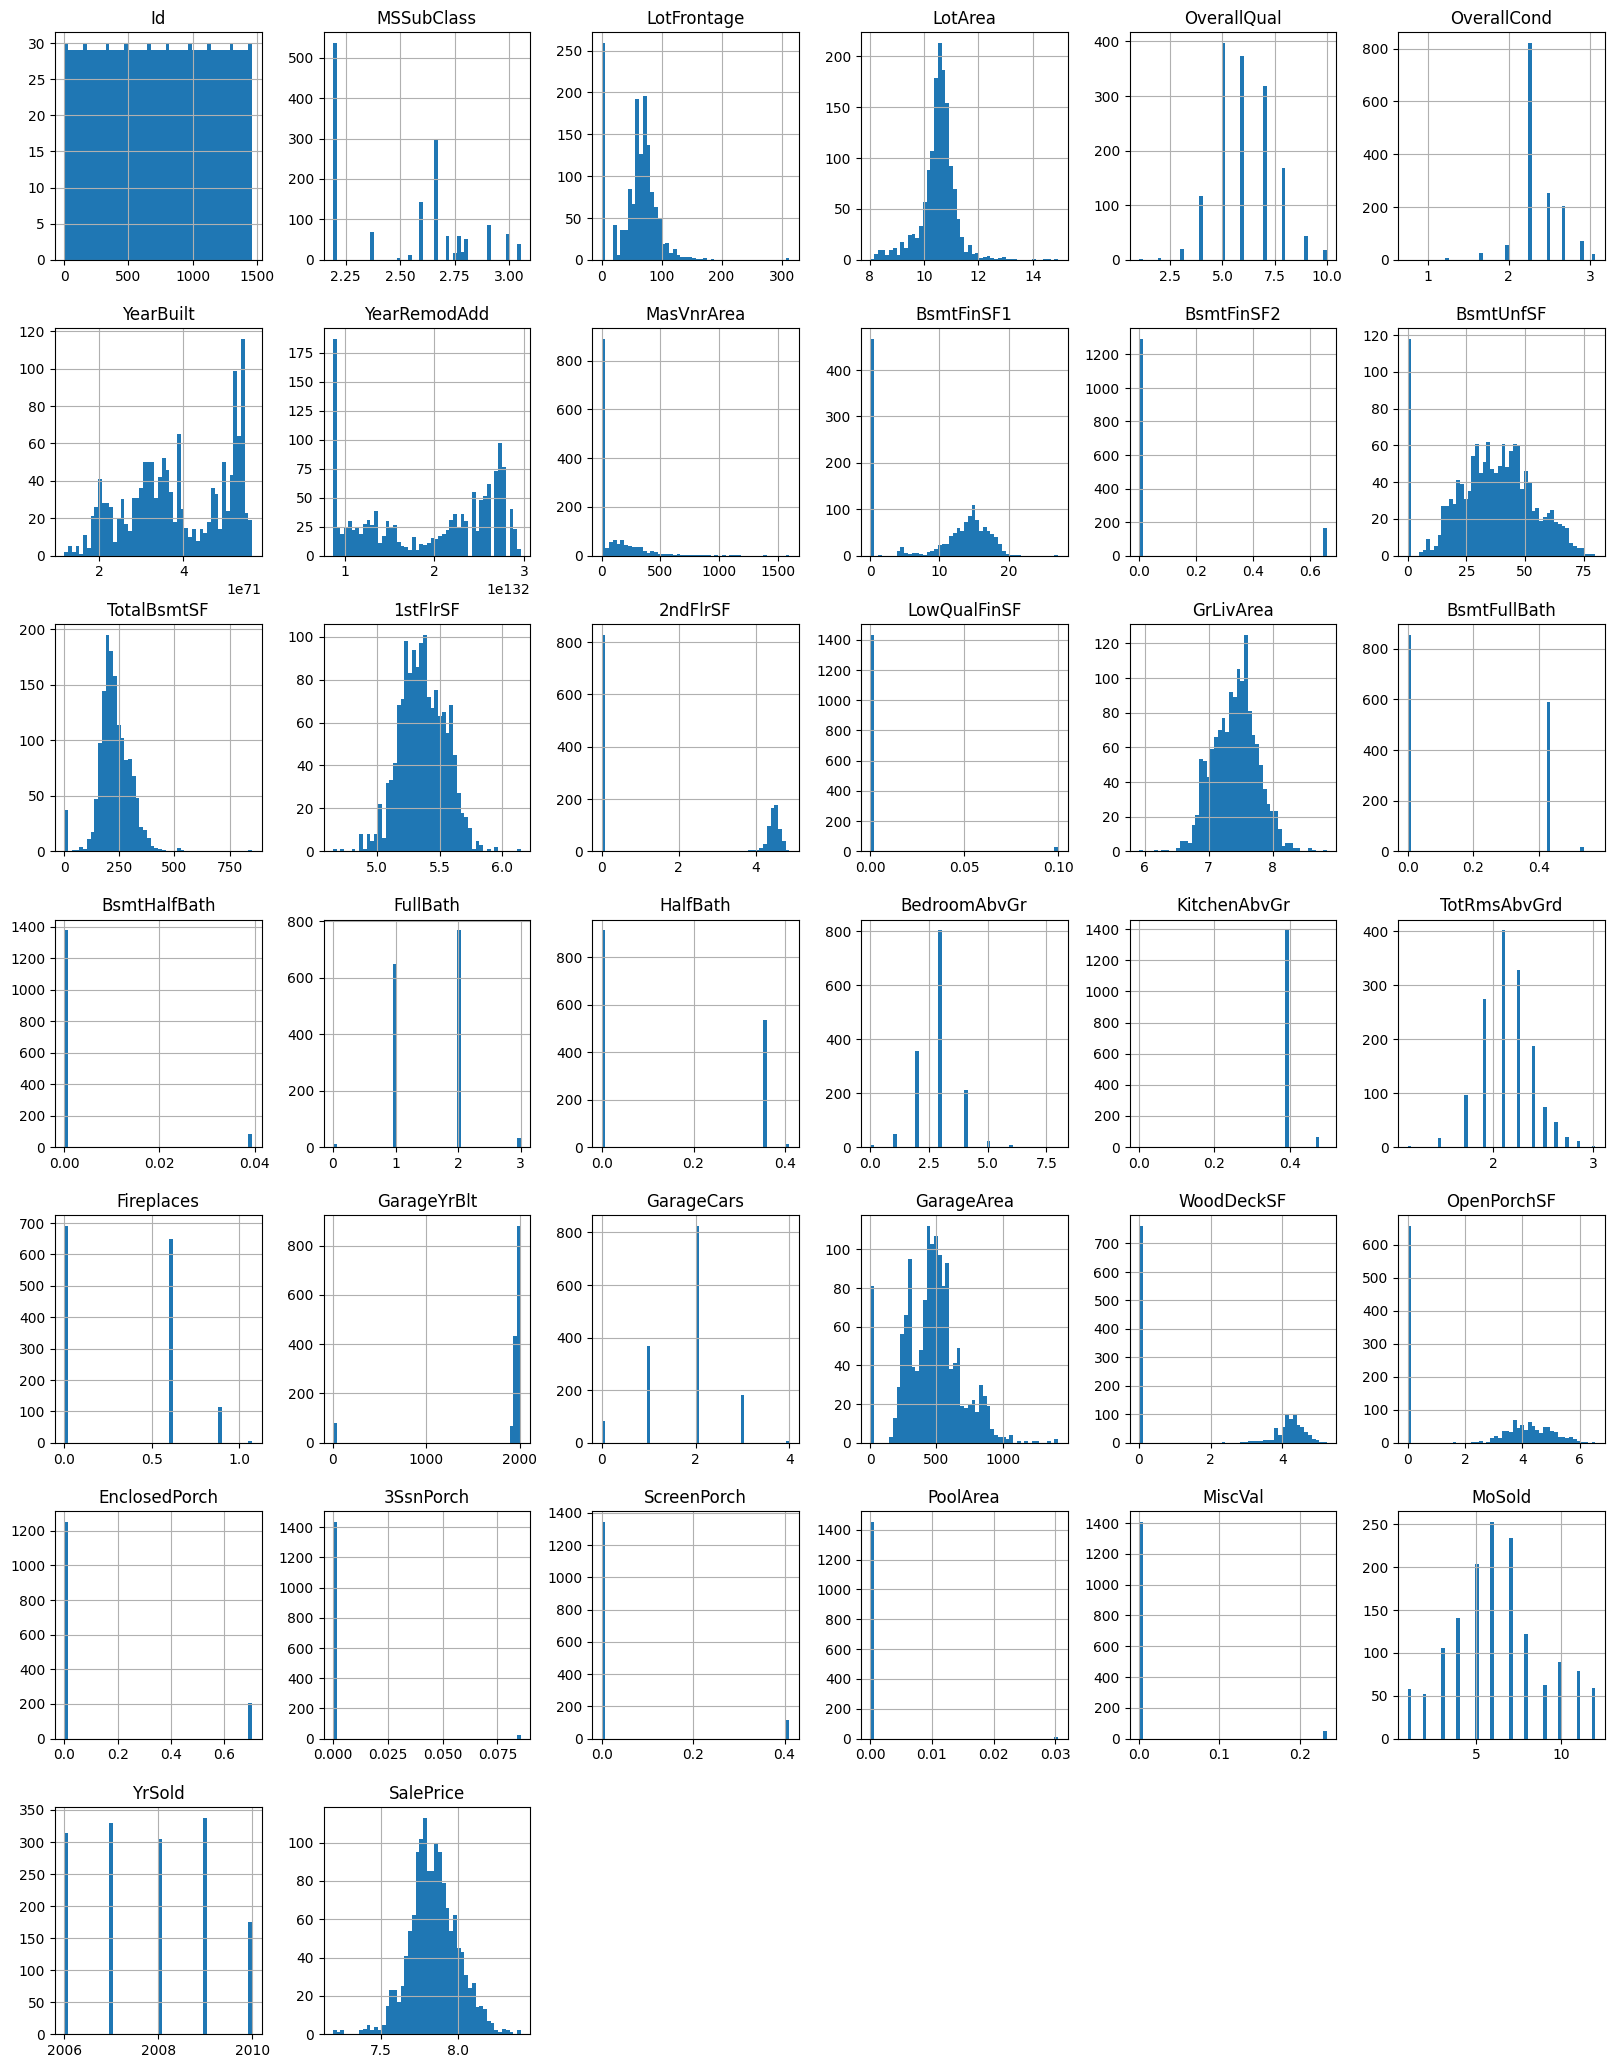

In [21]:
data.hist(figsize = (20,26), bins = 50, xlabelsize = 10, ylabelsize = 10)

C:\Users\longv\AppData\Local\Temp\ipykernel_17020\181506131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['1stFlrSF']);


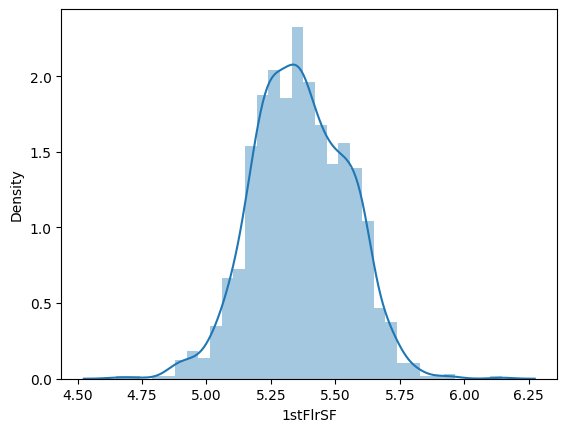

In [22]:
sns.distplot(data['1stFlrSF']);

Create new features


In [23]:
data['TotalSF'] = (data['TotalBsmtSF'] 
                       + data['1stFlrSF'] 
                       + data['2ndFlrSF'])

In [24]:
data['YrBltAndRemod'] = data['YearBuilt'] +data['YearRemodAdd']


In [25]:
data['Total_sqr_footage'] = (data['BsmtFinSF1'] 
                                 + data['BsmtFinSF2'] 
                                 + data['1stFlrSF'] 
                                 + data['2ndFlrSF']
                                )

In [26]:
data['Total_Bathrooms'] = (data['FullBath'] 
                               + (0.5 * data['HalfBath']) 
                               + data['BsmtFullBath'] 
                               + (0.5 * data['BsmtHalfBath'])
                              )

In [27]:
data['Total_porch_sf'] = (data['OpenPorchSF'] 
                              + data['3SsnPorch'] 
                              + data['EnclosedPorch'] 
                              + data['ScreenPorch'] 
                              + data['WoodDeckSF']
                             )

In [28]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf
0,1,2.661928,RL,65.0,10.427531,Pave,0,Reg,Lvl,AllPub,...,2,2008,WD,Normal,7.932276,208.031759,2.572536e+132,24.982831,2.601479,4.227899
1,2,2.191299,RL,80.0,10.596445,Pave,0,Reg,Lvl,AllPub,...,5,2007,WD,Normal,7.877935,270.043419,1.483383e+132,22.193136,2.019743,4.594581
2,3,2.661928,RL,68.0,10.807340,Pave,0,IR1,Lvl,AllPub,...,9,2008,WD,Normal,7.959281,219.002015,2.520944e+132,23.428128,2.601479,3.844769
3,4,2.720051,RL,60.0,10.589519,Pave,0,IR1,Lvl,AllPub,...,2,2006,WD,Abnorml,7.774637,190.542568,1.311218e+132,20.356161,1.425418,4.363332
4,5,2.661928,RL,84.0,11.124530,Pave,0,IR1,Lvl,AllPub,...,12,2008,WD,Normal,8.002533,256.153083,2.420770e+132,24.904763,2.601479,8.869597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,2.661928,RL,62.0,10.341536,Pave,0,Reg,Lvl,AllPub,...,8,2007,WD,Normal,7.863548,224.481924,2.420770e+132,9.720894,2.176061,3.795022
1456,1457,2.191299,RL,85.0,11.018398,Pave,0,Reg,Lvl,AllPub,...,2,2010,WD,Normal,7.935070,312.771166,1.896375e+132,22.119487,2.425418,4.694579
1457,1458,2.720051,RL,66.0,10.517089,Pave,0,Reg,Lvl,AllPub,...,5,2010,WD,Normal,8.027038,257.328050,2.733569e+132,21.499866,2.000000,4.210840
1458,1459,2.191299,RL,68.0,10.612516,Pave,0,Reg,Lvl,AllPub,...,4,2010,WD,Normal,7.780688,240.717864,2.231933e+132,12.335382,1.425418,5.427846


In [29]:
data['haspool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasgarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasfireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [30]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,1,2.661928,RL,65.0,10.427531,Pave,0,Reg,Lvl,AllPub,...,208.031759,2.572536e+132,24.982831,2.601479,4.227899,0,1,1,1,0
1,2,2.191299,RL,80.0,10.596445,Pave,0,Reg,Lvl,AllPub,...,270.043419,1.483383e+132,22.193136,2.019743,4.594581,0,0,1,1,1
2,3,2.661928,RL,68.0,10.807340,Pave,0,IR1,Lvl,AllPub,...,219.002015,2.520944e+132,23.428128,2.601479,3.844769,0,1,1,1,1
3,4,2.720051,RL,60.0,10.589519,Pave,0,IR1,Lvl,AllPub,...,190.542568,1.311218e+132,20.356161,1.425418,4.363332,0,1,1,1,1
4,5,2.661928,RL,84.0,11.124530,Pave,0,IR1,Lvl,AllPub,...,256.153083,2.420770e+132,24.904763,2.601479,8.869597,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,2.661928,RL,62.0,10.341536,Pave,0,Reg,Lvl,AllPub,...,224.481924,2.420770e+132,9.720894,2.176061,3.795022,0,1,1,1,1
1456,1457,2.191299,RL,85.0,11.018398,Pave,0,Reg,Lvl,AllPub,...,312.771166,1.896375e+132,22.119487,2.425418,4.694579,0,0,1,1,1
1457,1458,2.720051,RL,66.0,10.517089,Pave,0,Reg,Lvl,AllPub,...,257.328050,2.733569e+132,21.499866,2.000000,4.210840,0,1,1,1,1
1458,1459,2.191299,RL,68.0,10.612516,Pave,0,Reg,Lvl,AllPub,...,240.717864,2.231933e+132,12.335382,1.425418,5.427846,0,0,1,1,0


C:\Users\longv\AppData\Local\Temp\ipykernel_17020\938546818.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['haspool']);


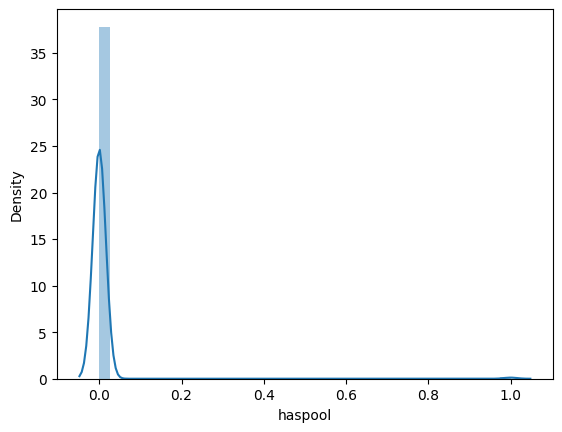

In [31]:
sns.distplot(data['haspool']);

In [32]:
data['haspool'].describe()

count    1460.000000
mean        0.004795
std         0.069100
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: haspool, dtype: float64

In [33]:
data = data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

In [34]:
object_feat = data.dtypes[data.dtypes == "object"].index

In [35]:
data_obj = data[object_feat]

Chuyen object feature thanh numeric

In [36]:
#one hot encoding
def one_hot_encoding(df):
    for col in df.columns:
        dummy_columns = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummy_columns], axis=1)
        df.drop(columns=[col], inplace=True)
    return df


In [37]:
data_obj = one_hot_encoding(data_obj)

In [38]:
data_obj

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_0,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,True,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,True,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,True,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1456,False,False,False,True,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1457,False,False,False,True,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1458,False,False,False,True,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [39]:
#chuyen thanh 0/1
col = data_obj.columns
data_obj[col] = data_obj[col].astype(int)

In [40]:
data_obj

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_0,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [41]:
for i in data_obj.columns:
    counts = data_obj[i].value_counts()
    print (counts)

MSZoning_C (all)
0    1450
1      10
Name: count, dtype: int64
MSZoning_FV
0    1395
1      65
Name: count, dtype: int64
MSZoning_RH
0    1444
1      16
Name: count, dtype: int64
MSZoning_RL
1    1151
0     309
Name: count, dtype: int64
MSZoning_RM
0    1242
1     218
Name: count, dtype: int64
Alley_0
1    1369
0      91
Name: count, dtype: int64
Alley_Grvl
0    1410
1      50
Name: count, dtype: int64
Alley_Pave
0    1419
1      41
Name: count, dtype: int64
LotShape_IR1
0    976
1    484
Name: count, dtype: int64
LotShape_IR2
0    1419
1      41
Name: count, dtype: int64
LotShape_IR3
0    1450
1      10
Name: count, dtype: int64
LotShape_Reg
1    925
0    535
Name: count, dtype: int64
LandContour_Bnk
0    1397
1      63
Name: count, dtype: int64
LandContour_HLS
0    1410
1      50
Name: count, dtype: int64
LandContour_Low
0    1424
1      36
Name: count, dtype: int64
LandContour_Lvl
1    1311
0     149
Name: count, dtype: int64
LotConfig_Corner
0    1197
1     263
Name: count, dtype: 

In [42]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,1,2.661928,RL,65.0,10.427531,0,Reg,Lvl,Inside,Gtl,...,208.031759,2.572536e+132,24.982831,2.601479,4.227899,0,1,1,1,0
1,2,2.191299,RL,80.0,10.596445,0,Reg,Lvl,FR2,Gtl,...,270.043419,1.483383e+132,22.193136,2.019743,4.594581,0,0,1,1,1
2,3,2.661928,RL,68.0,10.807340,0,IR1,Lvl,Inside,Gtl,...,219.002015,2.520944e+132,23.428128,2.601479,3.844769,0,1,1,1,1
3,4,2.720051,RL,60.0,10.589519,0,IR1,Lvl,Corner,Gtl,...,190.542568,1.311218e+132,20.356161,1.425418,4.363332,0,1,1,1,1
4,5,2.661928,RL,84.0,11.124530,0,IR1,Lvl,FR2,Gtl,...,256.153083,2.420770e+132,24.904763,2.601479,8.869597,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,2.661928,RL,62.0,10.341536,0,Reg,Lvl,Inside,Gtl,...,224.481924,2.420770e+132,9.720894,2.176061,3.795022,0,1,1,1,1
1456,1457,2.191299,RL,85.0,11.018398,0,Reg,Lvl,Inside,Gtl,...,312.771166,1.896375e+132,22.119487,2.425418,4.694579,0,0,1,1,1
1457,1458,2.720051,RL,66.0,10.517089,0,Reg,Lvl,Inside,Gtl,...,257.328050,2.733569e+132,21.499866,2.000000,4.210840,0,1,1,1,1
1458,1459,2.191299,RL,68.0,10.612516,0,Reg,Lvl,Inside,Gtl,...,240.717864,2.231933e+132,12.335382,1.425418,5.427846,0,0,1,1,0


In [43]:
num_feat = data.dtypes[data.dtypes != "object"].index

In [44]:
num_feat

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'TotalSF', 'YrBltAndRemod',
       'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'haspool',
       'has2ndfloor', 'hasgarage', 'hasbsmt', 'hasfireplace'],
      dtype='object')

In [45]:
data_num = data[num_feat].drop(['Id', 'SalePrice'], axis = 1)

In [46]:
data_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,2.661928,65.0,10.427531,7,2.235408,5.219201e+71,2.572536e+132,196.0,15.235367,0.000000,...,208.031759,2.572536e+132,24.982831,2.601479,4.227899,0,1,1,1,0
1,2.191299,80.0,10.596445,6,2.888050,3.865896e+71,1.483383e+132,0.0,16.750862,0.000000,...,270.043419,1.483383e+132,22.193136,2.019743,4.594581,0,0,1,1,1
2,2.661928,68.0,10.807340,7,2.235408,5.105151e+71,2.520944e+132,162.0,13.632899,0.000000,...,219.002015,2.520944e+132,23.428128,2.601479,3.844769,0,1,1,1,1
3,2.720051,60.0,10.589519,7,2.235408,1.932280e+71,1.311218e+132,0.0,10.593523,0.000000,...,190.542568,1.311218e+132,20.356161,1.425418,4.363332,0,1,1,1,1
4,2.661928,84.0,11.124530,8,2.235408,5.049022e+71,2.420770e+132,350.0,14.902455,0.000000,...,256.153083,2.420770e+132,24.904763,2.601479,8.869597,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2.661928,62.0,10.341536,6,2.235408,4.993483e+71,2.420770e+132,0.0,0.000000,0.000000,...,224.481924,2.420770e+132,9.720894,2.176061,3.795022,0,1,1,1,1
1456,2.191299,85.0,11.018398,6,2.476126,3.953365e+71,1.896375e+132,119.0,15.745374,0.656944,...,312.771166,1.896375e+132,22.119487,2.425418,4.694579,0,0,1,1,1
1457,2.720051,66.0,10.517089,7,3.068224,2.603741e+71,2.733569e+132,0.0,11.439833,0.000000,...,257.328050,2.733569e+132,21.499866,2.000000,4.210840,0,1,1,1,1
1458,2.191299,68.0,10.612516,5,2.476126,2.884236e+71,2.231933e+132,0.0,6.325470,0.657207,...,240.717864,2.231933e+132,12.335382,1.425418,5.427846,0,0,1,1,0


In [47]:
full_data = pd.concat([data_obj, data_num], axis = 1)

In [48]:
full_data

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_0,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,...,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,0,0,0,1,0,1,0,0,0,0,...,208.031759,2.572536e+132,24.982831,2.601479,4.227899,0,1,1,1,0
1,0,0,0,1,0,1,0,0,0,0,...,270.043419,1.483383e+132,22.193136,2.019743,4.594581,0,0,1,1,1
2,0,0,0,1,0,1,0,0,1,0,...,219.002015,2.520944e+132,23.428128,2.601479,3.844769,0,1,1,1,1
3,0,0,0,1,0,1,0,0,1,0,...,190.542568,1.311218e+132,20.356161,1.425418,4.363332,0,1,1,1,1
4,0,0,0,1,0,1,0,0,1,0,...,256.153083,2.420770e+132,24.904763,2.601479,8.869597,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,1,0,0,0,0,...,224.481924,2.420770e+132,9.720894,2.176061,3.795022,0,1,1,1,1
1456,0,0,0,1,0,1,0,0,0,0,...,312.771166,1.896375e+132,22.119487,2.425418,4.694579,0,0,1,1,1
1457,0,0,0,1,0,1,0,0,0,0,...,257.328050,2.733569e+132,21.499866,2.000000,4.210840,0,1,1,1,1
1458,0,0,0,1,0,1,0,0,0,0,...,240.717864,2.231933e+132,12.335382,1.425418,5.427846,0,0,1,1,0


In [49]:
price = pd.read_csv('../raw data/train.csv')['SalePrice']

In [50]:
price

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [51]:
log_price  = np.log(price)

In [52]:
log_price

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

C:\Users\longv\AppData\Local\Temp\ipykernel_17020\1652943238.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_price);


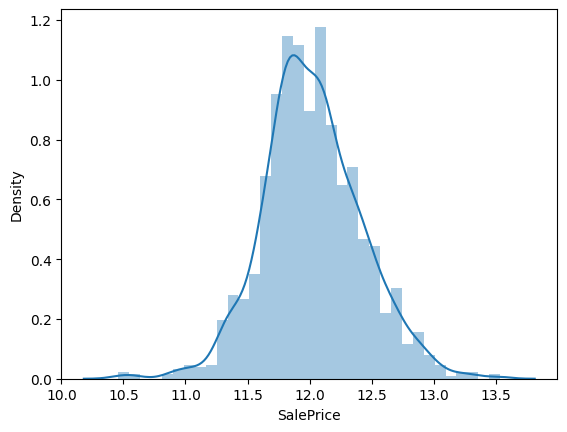

In [53]:
sns.distplot(log_price);

In [54]:
full_data

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_0,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,...,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,0,0,0,1,0,1,0,0,0,0,...,208.031759,2.572536e+132,24.982831,2.601479,4.227899,0,1,1,1,0
1,0,0,0,1,0,1,0,0,0,0,...,270.043419,1.483383e+132,22.193136,2.019743,4.594581,0,0,1,1,1
2,0,0,0,1,0,1,0,0,1,0,...,219.002015,2.520944e+132,23.428128,2.601479,3.844769,0,1,1,1,1
3,0,0,0,1,0,1,0,0,1,0,...,190.542568,1.311218e+132,20.356161,1.425418,4.363332,0,1,1,1,1
4,0,0,0,1,0,1,0,0,1,0,...,256.153083,2.420770e+132,24.904763,2.601479,8.869597,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,1,0,0,0,0,...,224.481924,2.420770e+132,9.720894,2.176061,3.795022,0,1,1,1,1
1456,0,0,0,1,0,1,0,0,0,0,...,312.771166,1.896375e+132,22.119487,2.425418,4.694579,0,0,1,1,1
1457,0,0,0,1,0,1,0,0,0,0,...,257.328050,2.733569e+132,21.499866,2.000000,4.210840,0,1,1,1,1
1458,0,0,0,1,0,1,0,0,0,0,...,240.717864,2.231933e+132,12.335382,1.425418,5.427846,0,0,1,1,0


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(full_data, log_price,test_size = .2, random_state = 0)

In [57]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1168, 305), (1168,), (292, 305), (292,))

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Call in the LinearRegression object
lin_reg = LinearRegression()
## fit train and test data. 
lin_reg.fit(X_train, y_train)
## Predict test data. 
y_pred = lin_reg.predict(X_test)

In [95]:
print (mean_squared_error(y_test, y_pred))

0.11995517540156829


In [96]:
print (mean_squared_error(y_train, lin_reg.predict(X_train)))

0.11838870996856918


In [97]:
def print_bias_variance(model):
    print ("bias: ", mean_squared_error(y_train, model.predict(X_train)))
    print ("variance", mean_squared_error(y_train, model.predict(X_train))- mean_squared_error(y_test, y_pred))

In [98]:
print_bias_variance(lin_reg)

bias:  0.11838870996856918
variance -0.0015664654329991118


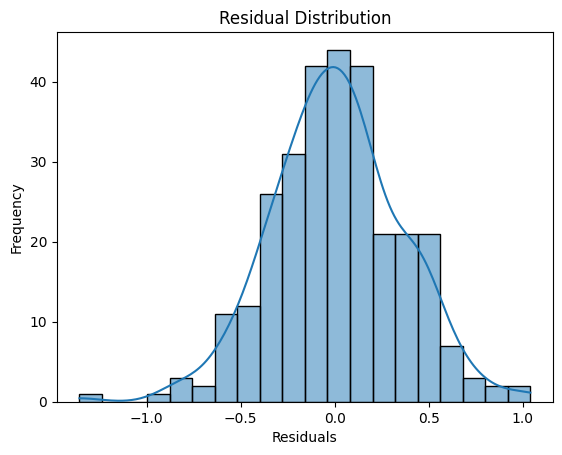

In [99]:
residuals = y_pred - y_test

# Plotting
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [100]:
def plot_residual(model):
    residual = y_test - model.predict(X_test)
    sns.histplot(residuals, kde=True)
    plt.title('Residual Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

In [101]:
import scipy.stats as stats
def QQ_plot(model):
    residual = y_test - model.predict(X_test)
    stats.probplot(residuals.values.ravel(), dist="norm", plot=plt)
    plt.title('QQ Plot - Residuals vs. Normal Distribution')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()

In [102]:
from scipy.stats import shapiro
def Shapiro(model):
    residuals = y_test - model.predict(X_test)
    stat, p_value = shapiro(residuals)
    print("Shapiro-Wilk test statistic:", stat)
    print("p-value:", p_value)
    
    alpha = 0.05
    if p_value > alpha:
        print("Residuals are normally distributed (fail to reject H0)")
    else:
        print("Residuals are not normally distributed (reject H0)")

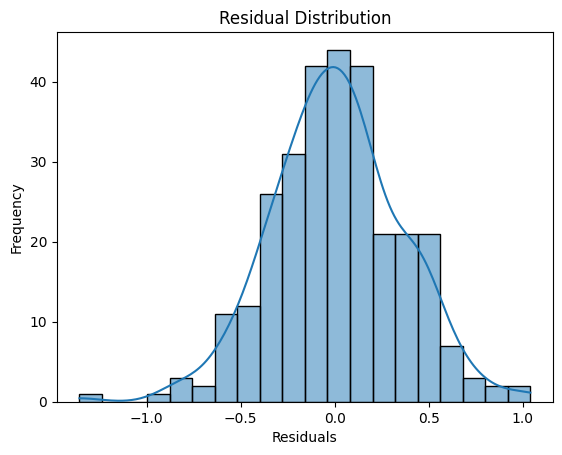

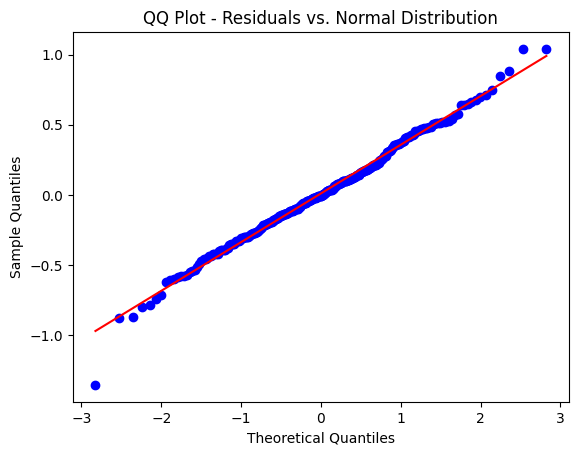

Shapiro-Wilk test statistic: 0.9935660236842242
p-value: 0.24725664977594908
Residuals are normally distributed (fail to reject H0)


In [103]:
plot_residual(lin_reg)
QQ_plot(lin_reg)
Shapiro(lin_reg)

with alpha =  1e-10
bias:  0.1112297525524113
variance 0.0006963139232281368


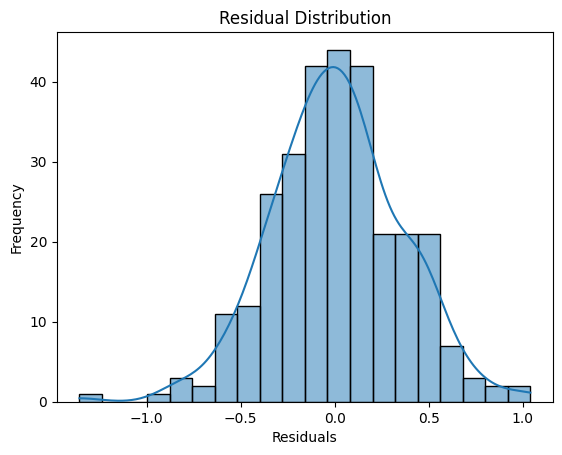

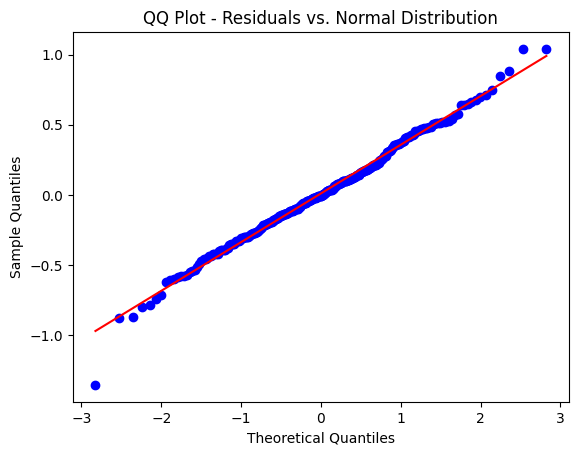

with alpha =  1e-08
bias:  0.007154652253440521
variance -0.037620524242340435


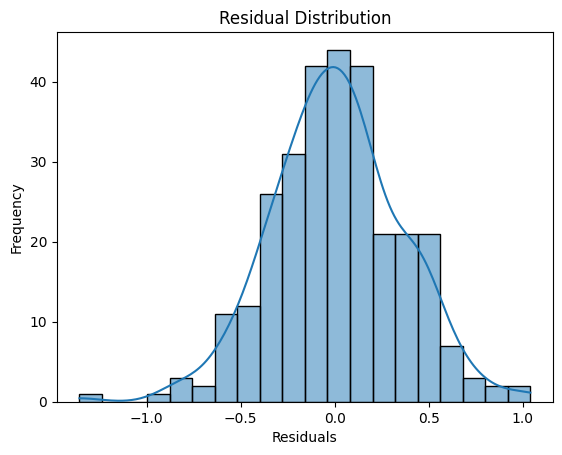

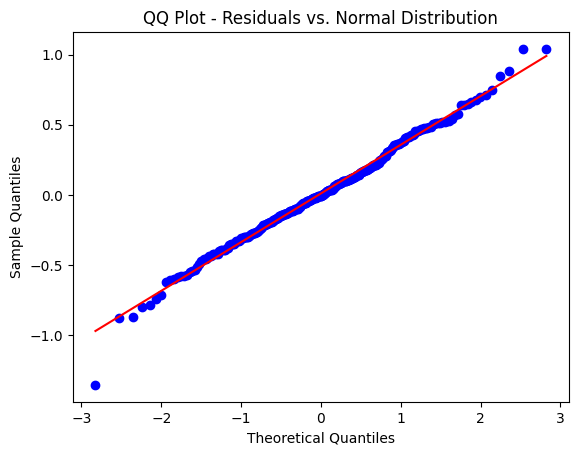

with alpha =  1e-05
bias:  0.1112297525524113
variance 0.0006963139232281368


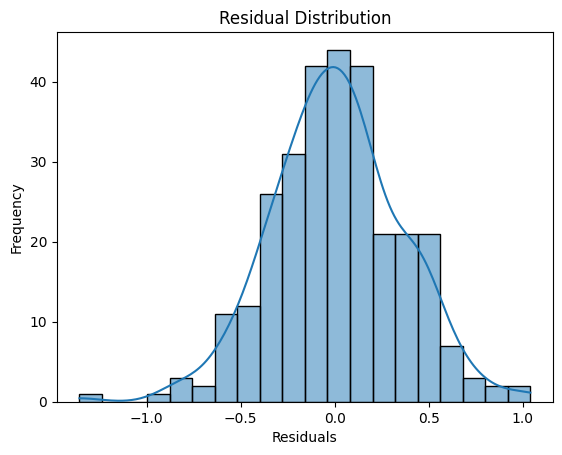

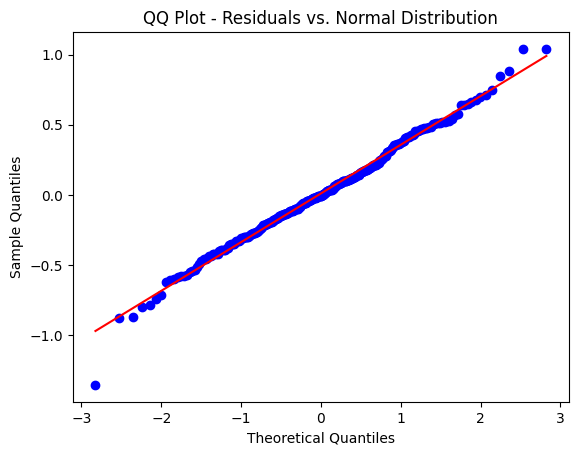

with alpha =  0.0001
bias:  0.1112297525524113
variance 0.0006963139232281368


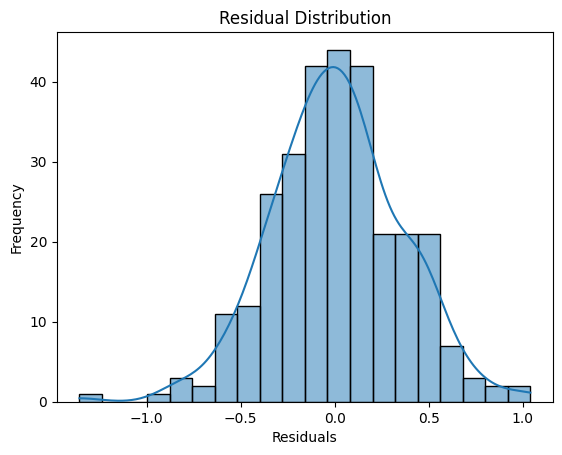

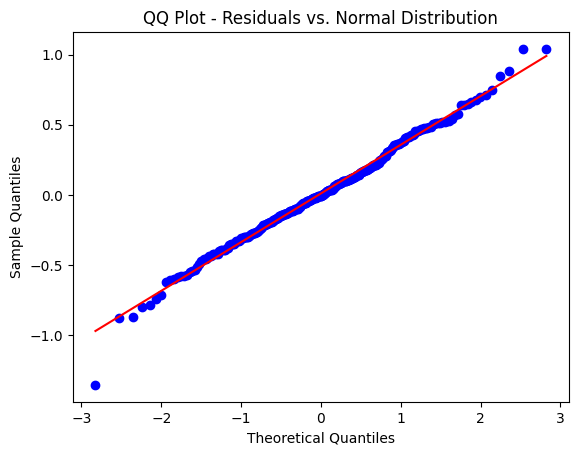

with alpha =  0.001
bias:  0.1112297525524113
variance 0.0006963139232281368


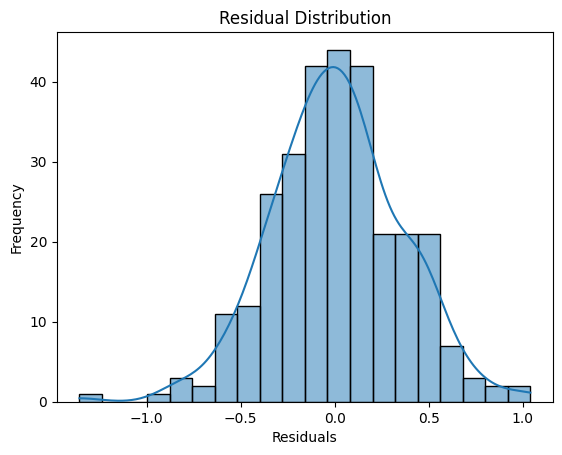

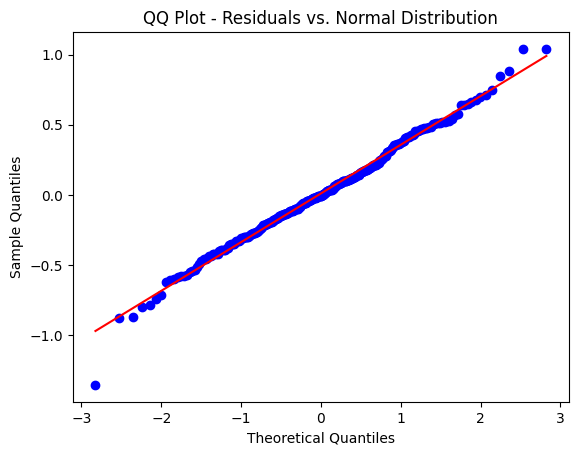

with alpha =  0.01
bias:  0.007158980618152285
variance -0.03335409026238097


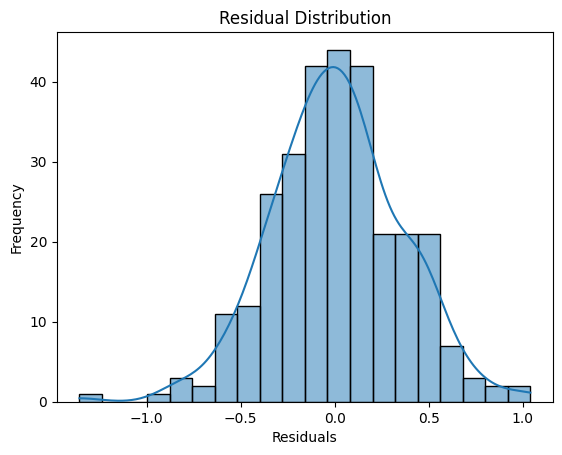

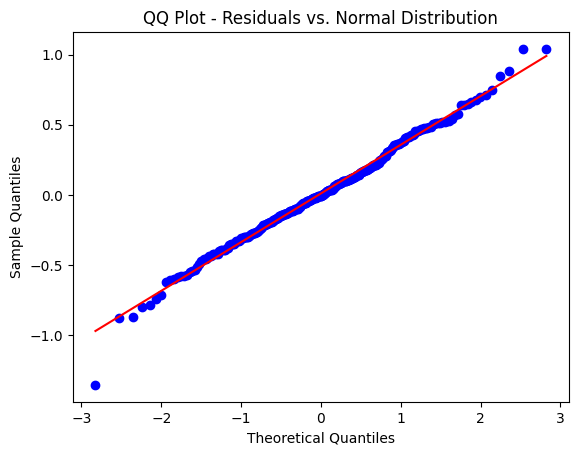

with alpha =  0.5
bias:  0.1112297525524113
variance 0.0006963139232281368


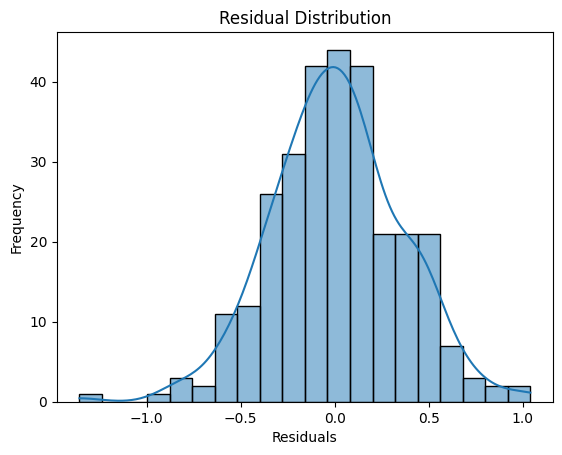

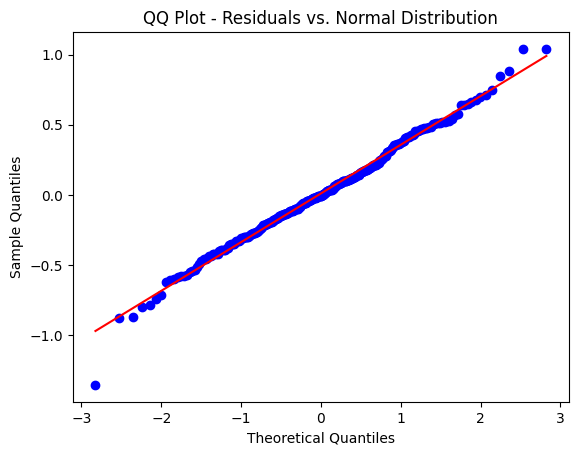

with alpha =  1
bias:  0.007905618857558664
variance -0.021291693748407038


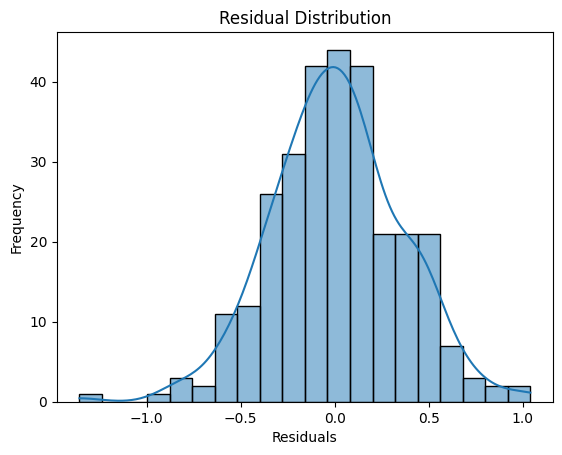

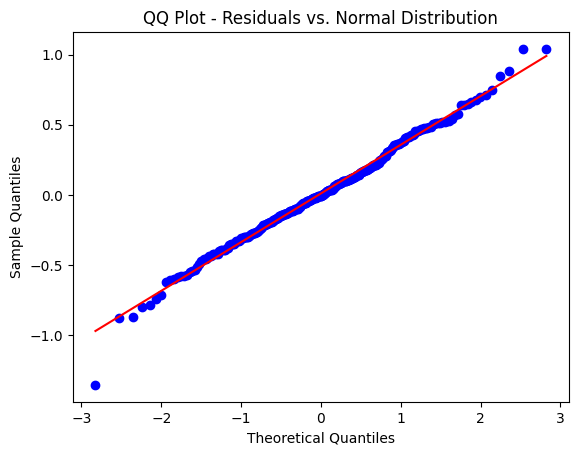

with alpha =  1.5
bias:  0.1112297525524113
variance 0.0006963139232281368


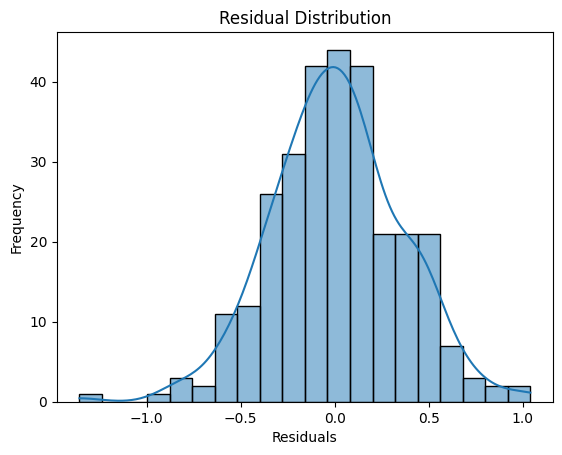

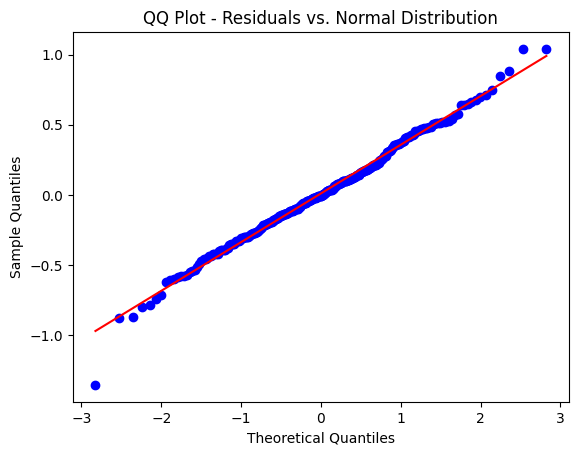

with alpha =  2
bias:  0.00838500793678189
variance -0.018730159368163822


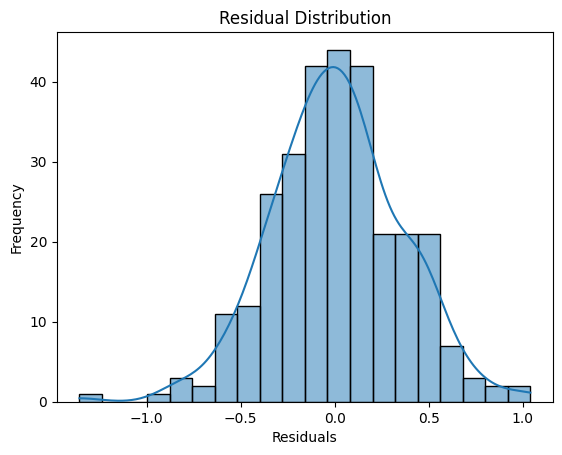

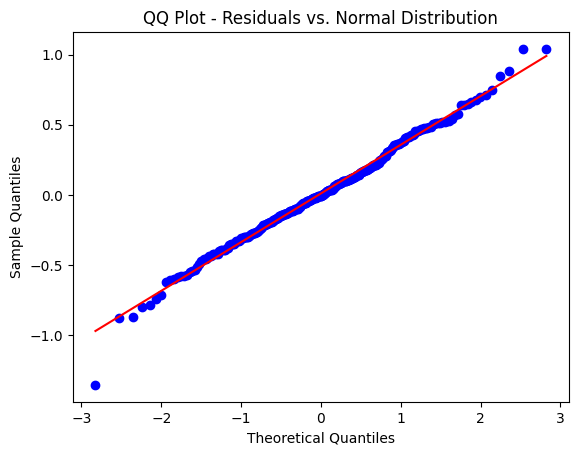

with alpha =  3
bias:  0.1112297525524113
variance 0.0006963139232281368


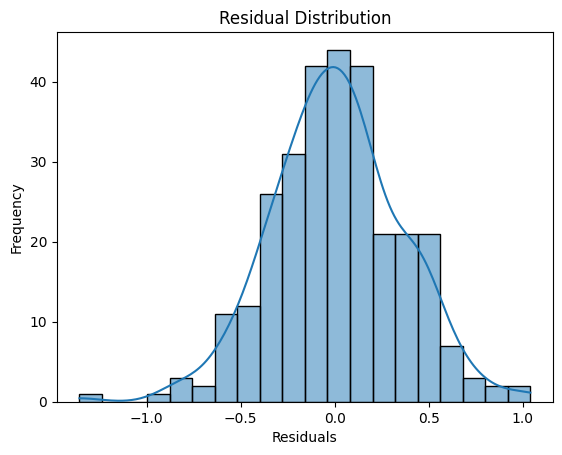

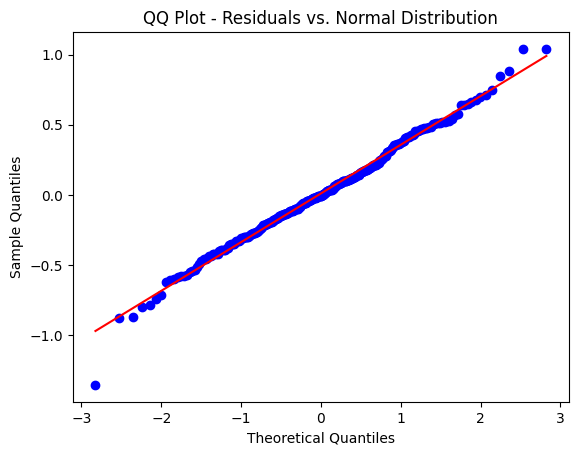

with alpha =  4
bias:  0.1112297525524113
variance 0.0006963139232281368


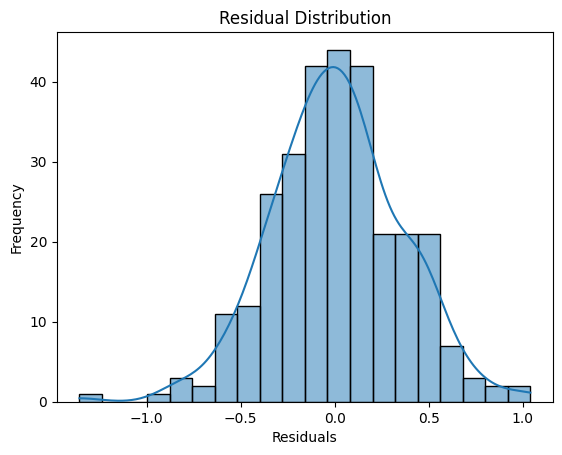

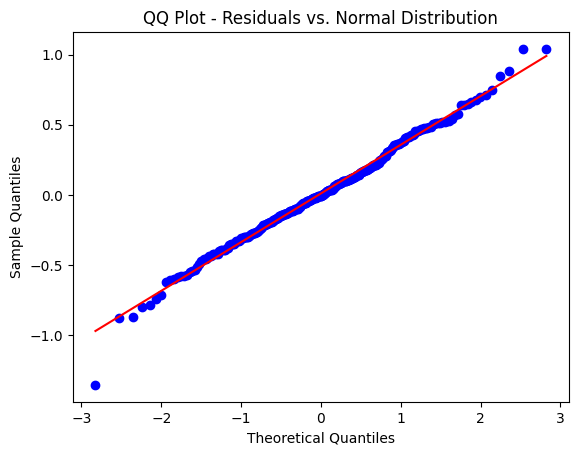

with alpha =  5
bias:  0.1112297525524113
variance 0.0006963139232281368


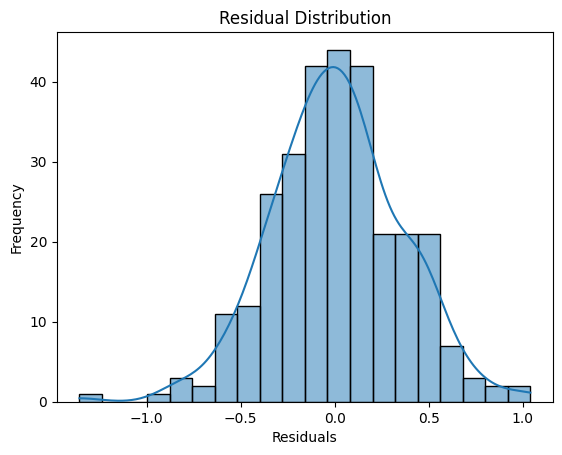

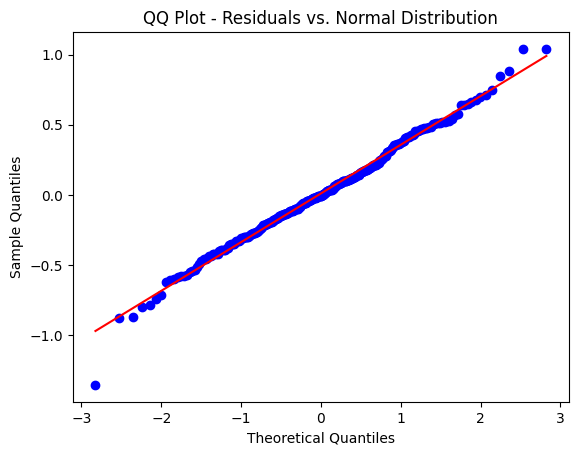

with alpha =  10
bias:  0.1112297525524113
variance 0.0006963139232281368


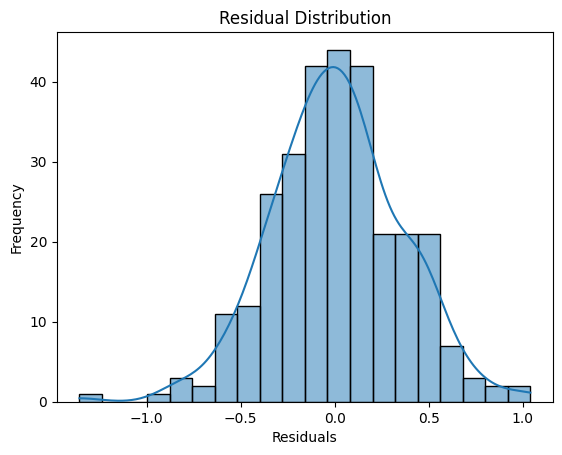

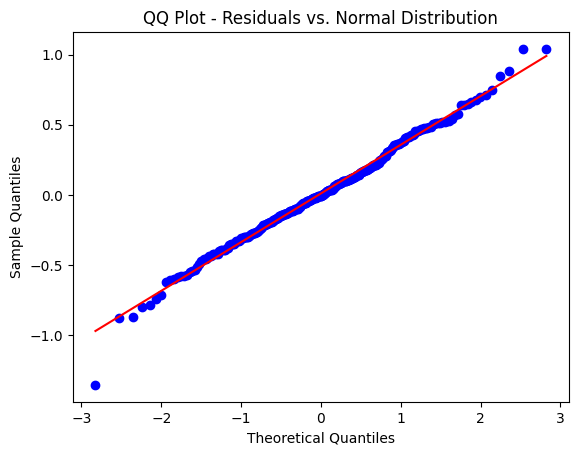

with alpha =  20
bias:  0.1112297525524113
variance 0.0006963139232281368


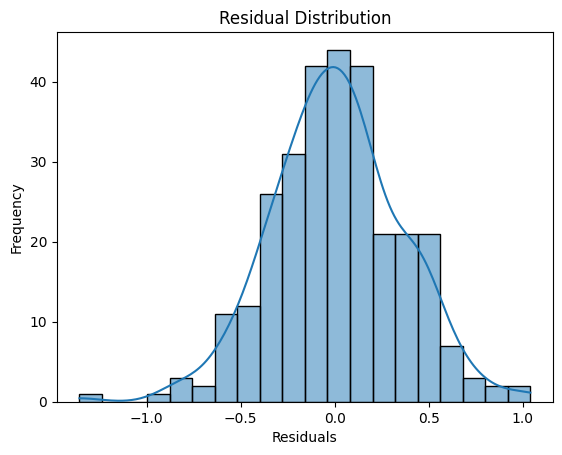

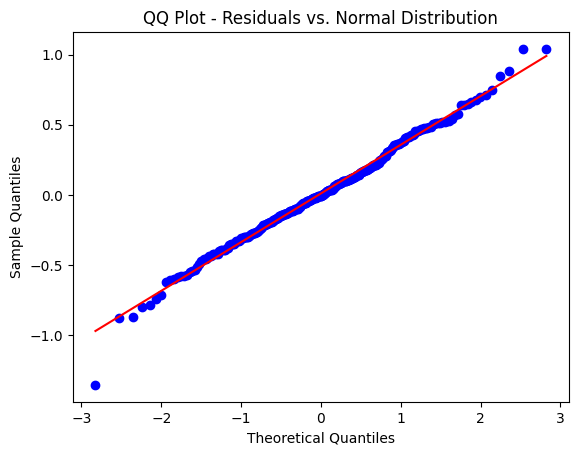

with alpha =  30
bias:  0.011834037367843511
variance -0.014997924923659773


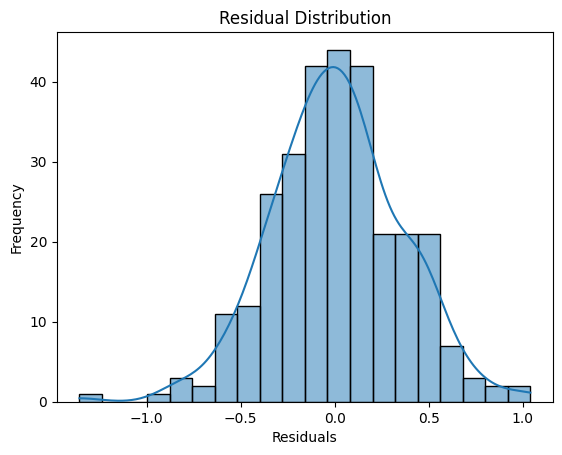

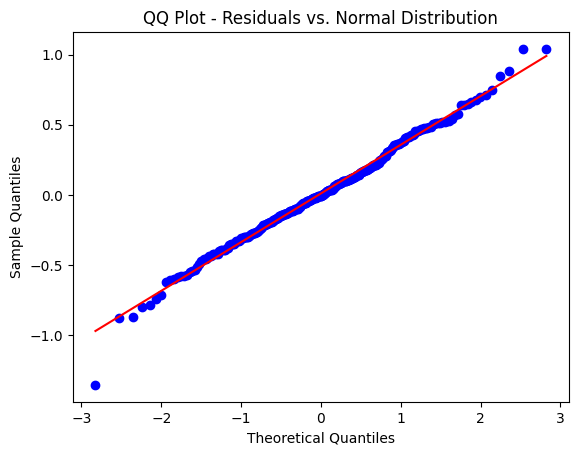

with alpha =  40
bias:  0.012431590064291509
variance -0.01495805713242071


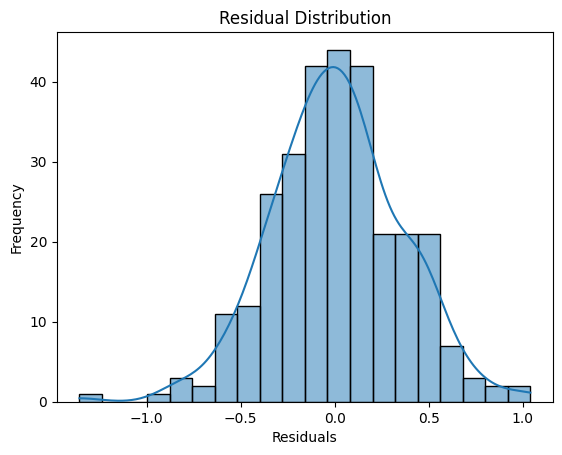

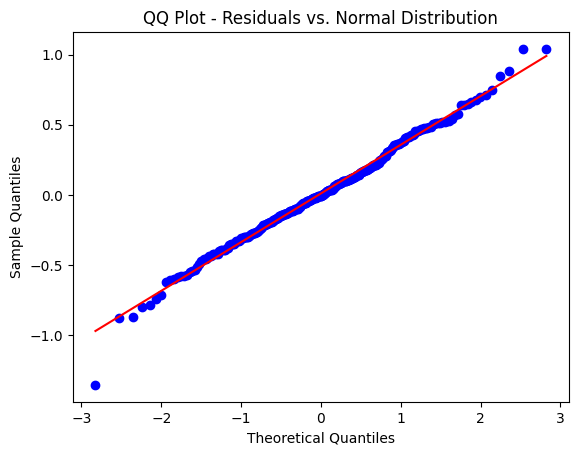

In [104]:
import warnings

# Tắt cảnh báo
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
## Assiging different sets of alpha values to explore which can be the best fit for the model. 
alpha_ridge = [1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2,3,4, 5, 10, 20, 30, 40]
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    ridge = Ridge(alpha= i)
    ## fit the model. 
    ridge.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = ridge.predict(X_test)
    print("with alpha = ", i)
    print_bias_variance(ridge)
    plot_residual(ridge)
    QQ_plot(ridge)
    

In [105]:
# alpha = 0.01
ridge = Ridge(alpha= 0.01)
    ## fit the model. 
ridge.fit(X_train, y_train)


Ridge(alpha=0.01)

In [165]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
## Assiging different sets of alpha values to explore which can be the best fit for the model. 
alpha_ridge = [1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2,3,4, 5, 10, 20, 30, 40]
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    ridge = Lasso(alpha= i)
    ## fit the model. 
    ridge.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = ridge.predict(X_test)
    print("with alpha = ", i)
    print_error(ridge)
    

with alpha =  1e-10
test_erorr 0.03936842186166079
train_error 0.007201125923199624
with alpha =  1e-08
test_erorr 0.03934533242288664
train_error 0.007201127200764096
with alpha =  1e-05
test_erorr 0.037496783714633546
train_error 0.0072339927989319396
with alpha =  0.0001
test_erorr 0.03257690784970261
train_error 0.007735023085110793
with alpha =  0.001
test_erorr 0.0252526069576155
train_error 0.011831767483790478
with alpha =  0.01
test_erorr 0.03615458012495184
train_error 0.02166290113617304
with alpha =  0.5
test_erorr 0.06512866697785182
train_error 0.05023673383287248
with alpha =  1
test_erorr 0.06434089217759204
train_error 0.05042595955343739
with alpha =  1.5
test_erorr 0.06372923258410024
train_error 0.05074133575437891
with alpha =  2
test_erorr 0.06329368819737617
train_error 0.05118286243569706
with alpha =  3
test_erorr 0.0629509450442317
train_error 0.05244436723946316
with alpha =  4
test_erorr 0.06331266271815872
train_error 0.05421047396473573
with alpha =  5
tes